- Class Imbalance would lead to a biased model which essentially is a model that is biased {favours} a particular class over the other
- The class this model would be biased for would essentially be the class with majority of datapoints

In [323]:
import warnings

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

warnings.filterwarnings('ignore')

In [6]:
input_data_path = 'Data/titanic3.xls'

df = pd.read_excel(input_data_path)

In [7]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [8]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [12]:
df.columns = [i.lower().replace('.','_').strip() for i in df.columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home_dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [14]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# EDA

### Analyzing the body feature

In [15]:
df.body.value_counts()

135.0    1
101.0    1
37.0     1
285.0    1
156.0    1
        ..
97.0     1
174.0    1
169.0    1
245.0    1
304.0    1
Name: body, Length: 121, dtype: int64

In [17]:
df[df.body.notna()].body

3       135.0
9        22.0
10      124.0
25      148.0
39      208.0
        ...  
1294     14.0
1296    131.0
1301    312.0
1304    328.0
1306    304.0
Name: body, Length: 121, dtype: float64

### Analyzing the name feature

In [18]:
df.name.nunique()

1307

In [19]:
df.shape[0]

1309

### Analyzing the pclass column

In [20]:
df.pclass.nunique()

3

In [21]:
df.pclass.value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

<AxesSubplot: xlabel='pclass', ylabel='count'>

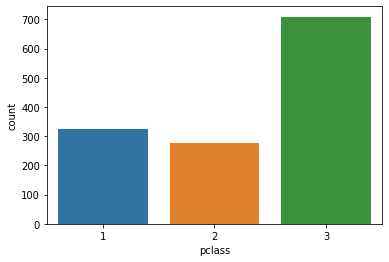

In [22]:
sns.countplot(data=df, x = 'pclass')

<AxesSubplot: xlabel='pclass', ylabel='count'>

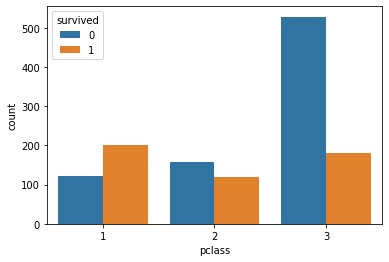

In [51]:
sns.countplot(data=df, x = 'pclass', hue = 'survived')

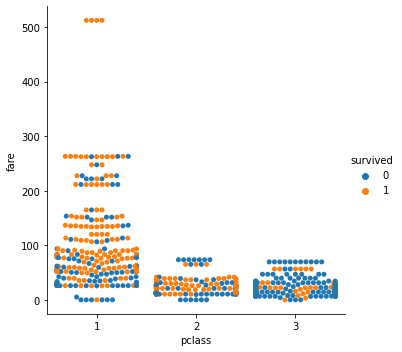

In [52]:
sns.catplot(data=df, x = 'pclass', y = 'fare', kind='swarm', hue = 'survived')

<AxesSubplot: xlabel='pclass', ylabel='count'>

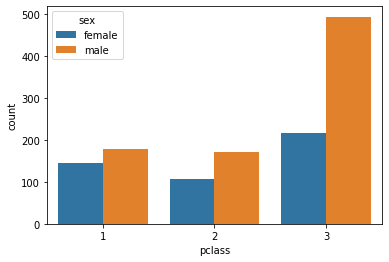

In [53]:
sns.countplot(data=df, x = 'pclass', hue = 'sex')

### Analyzing the Gender

In [54]:
df.sex.nunique()

2

In [55]:
df.sex.isna().sum()

0

In [56]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

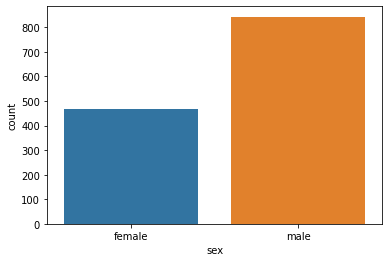

In [57]:
sns.countplot(data = df, x = 'sex')

<AxesSubplot: xlabel='sex', ylabel='count'>

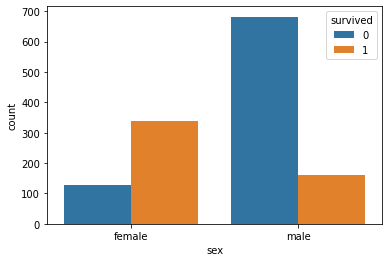

In [58]:
sns.countplot(data = df, x = 'sex', hue = 'survived')

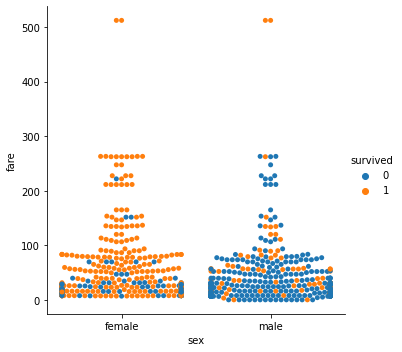

In [59]:
sns.catplot(data = df, x = 'sex', y = 'fare', kind = 'swarm', hue = 'survived')

### Analyzing the Age

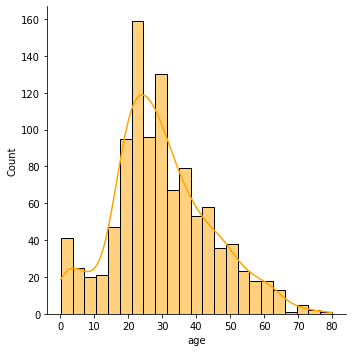

In [64]:
sns.displot(df.age, kde = True, color = 'orange')

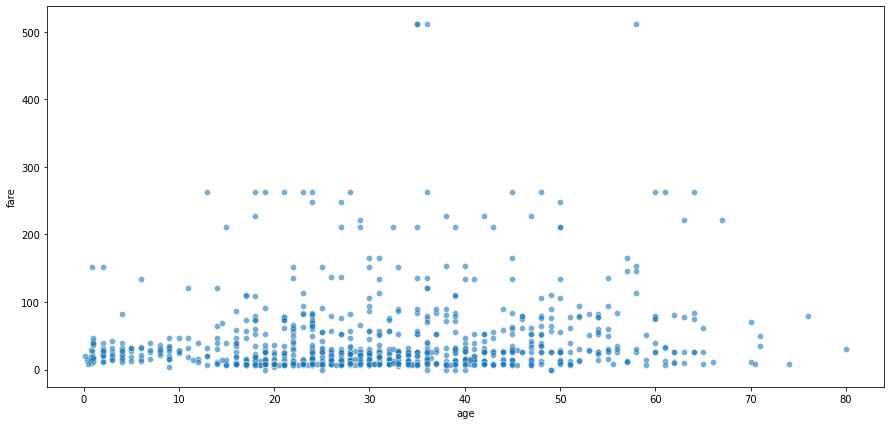

In [74]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, x = 'age', y = 'fare', alpha = 0.6)
plt.show()

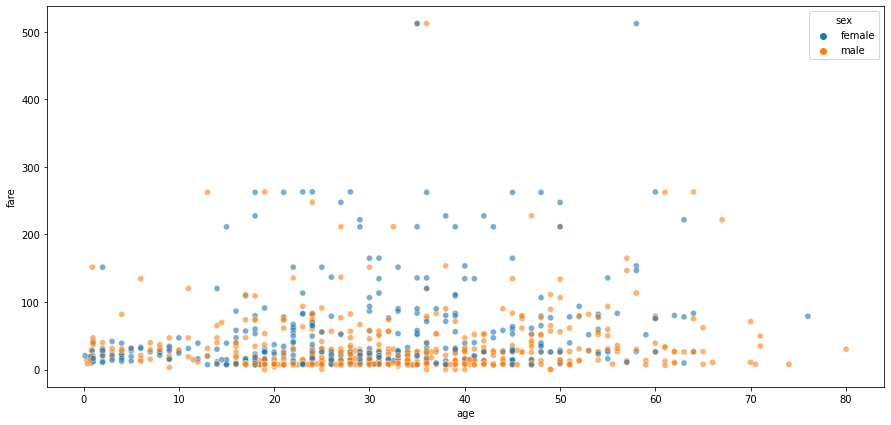

In [75]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, x = 'age', y = 'fare', alpha = 0.6, hue = 'sex')
plt.show()

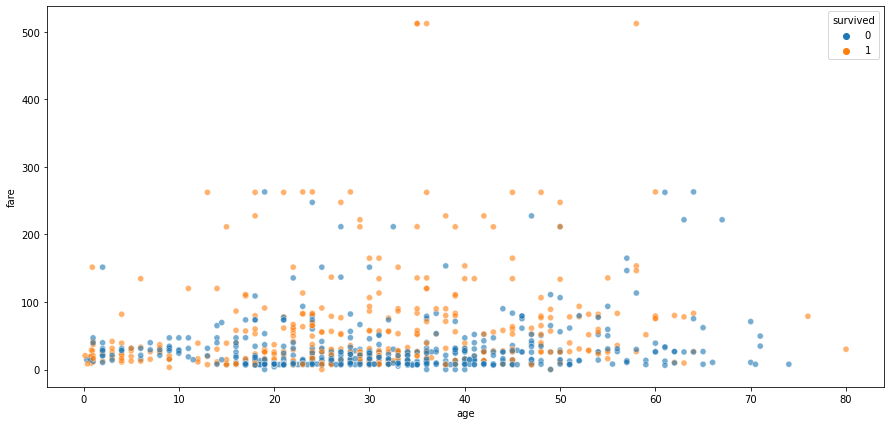

In [76]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = df, x = 'age', y = 'fare', alpha = 0.6, hue = 'survived')
plt.show()

#### Chunking the age column

In [82]:
df['age_chunks'] = pd.cut(df.age, bins = [df.age.min(),18, 55, df.age.max()], labels = ['Children', 'Adults', 'Seniors'])
df['age_chunks'].value_counts()

Adults      794
Children    192
Seniors      59
Name: age_chunks, dtype: int64

<AxesSubplot: xlabel='age_chunks', ylabel='count'>

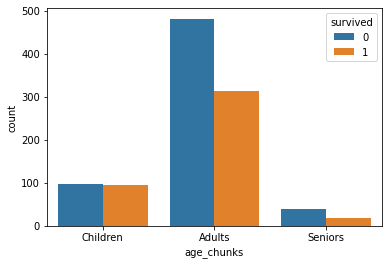

In [84]:
sns.countplot(data = df, x = 'age_chunks', hue = 'survived')

<AxesSubplot: xlabel='age_chunks', ylabel='count'>

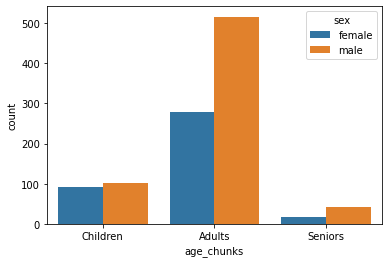

In [85]:
sns.countplot(data = df, x = 'age_chunks', hue = 'sex')

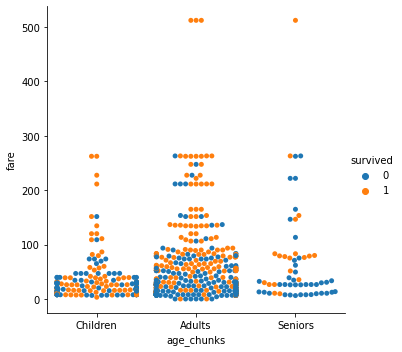

In [86]:
sns.catplot(data = df, x = 'age_chunks', y = 'fare', kind = 'swarm', hue = 'survived')

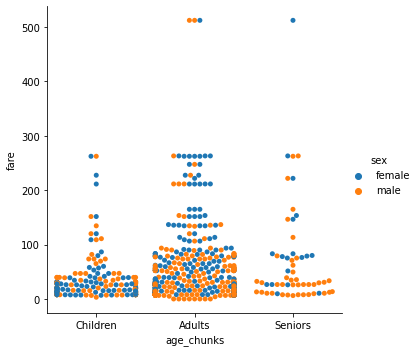

In [87]:
sns.catplot(data = df, x = 'age_chunks', y = 'fare', kind = 'swarm', hue = 'sex')

### Analyzing sibsp feature

In [89]:
df.sibsp.nunique()

7

In [90]:
df.sibsp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: sibsp, dtype: int64

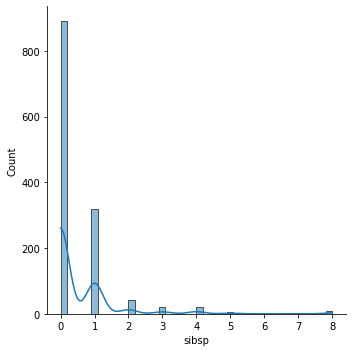

In [91]:
sns.displot(df.sibsp, kde = True)

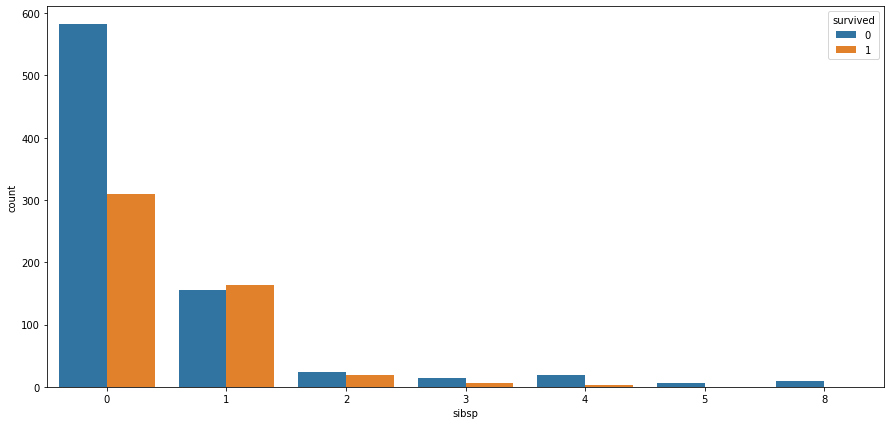

In [95]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'sibsp', hue = 'survived')
plt.show()

<Figure size 1080x360 with 0 Axes>

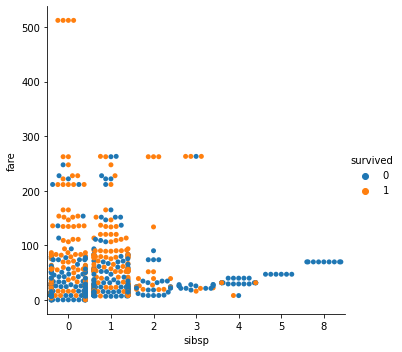

In [98]:
plt.figure(figsize = (15,5))
sns.catplot(data = df, x = 'sibsp', y = 'fare', hue = 'survived', kind = 'swarm')
plt.show()

<Figure size 1080x360 with 0 Axes>

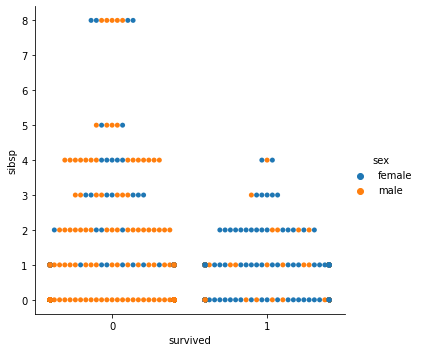

In [101]:
plt.figure(figsize = (15,5))
sns.catplot(data = df, x = 'survived', y = 'sibsp', hue = 'sex', kind = 'swarm')
plt.show()

### Analysing the parch feature

In [106]:
df.parch.isna().sum()

0

In [105]:
df.parch.nunique()

8

In [107]:
df.parch.value_counts()

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: parch, dtype: int64

<AxesSubplot: xlabel='parch', ylabel='count'>

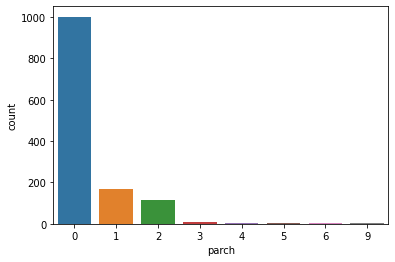

In [108]:
sns.countplot(data = df, x = 'parch')

<AxesSubplot: xlabel='parch', ylabel='count'>

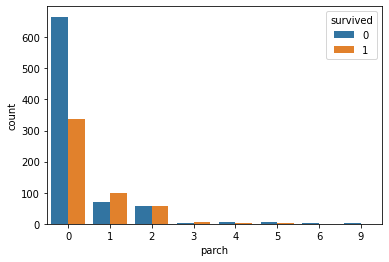

In [109]:
sns.countplot(data = df, x = 'parch', hue = 'survived')

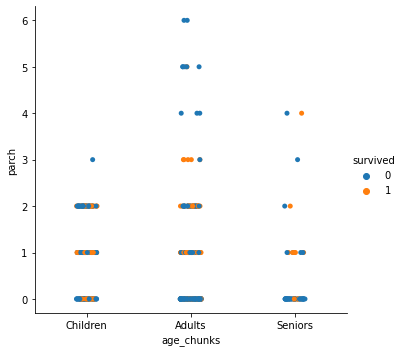

In [119]:
sns.catplot(data = df, x = 'age_chunks', y = 'parch', hue = 'survived')

### ticket

In [123]:
df.ticket.nunique()

939

### Analyzing cabin

In [125]:
df.cabin.value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64

In [135]:
df.shape[0]

1309

In [136]:
100*(df.cabin.isna().sum()/df.shape[0])

77.46371275783041

### Analyzing embarked

In [137]:
df.embarked.nunique()

3

<AxesSubplot: xlabel='embarked', ylabel='count'>

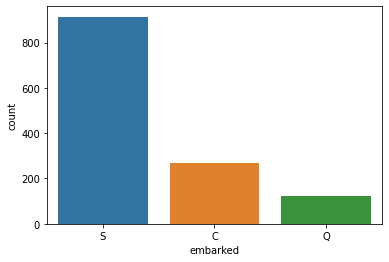

In [139]:
sns.countplot(data = df,x = 'embarked')

[(1.0, 0.6470588235294118, 0.0), (0.0, 0.5019607843137255, 0.0)]

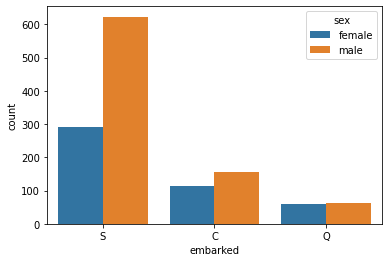

In [162]:
sns.countplot(data = df,x = 'embarked', hue = 'sex')
plt.show()

<AxesSubplot: xlabel='embarked', ylabel='count'>

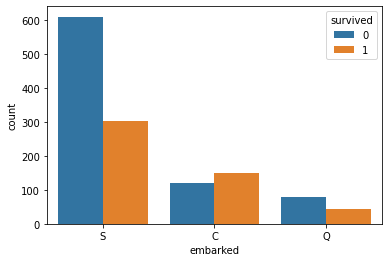

In [163]:
sns.countplot(data = df,x = 'embarked', hue = 'survived')

<AxesSubplot: xlabel='embarked', ylabel='count'>

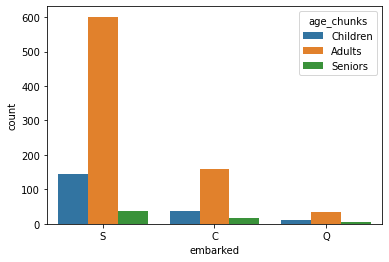

In [164]:
sns.countplot(data = df,x = 'embarked', hue = 'age_chunks')

### Analyzing body

In [167]:
100*(df.body.isna().sum()/df.shape[0])

90.75630252100841

In [174]:
df.body.value_counts()

135.0    1
101.0    1
37.0     1
285.0    1
156.0    1
        ..
97.0     1
174.0    1
169.0    1
245.0    1
304.0    1
Name: body, Length: 121, dtype: int64

In [172]:
df['MissingBodyIndicator'] = np.where(df.body.isna(), 1, 0)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,age_chunks,MissingBodyIndicator
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adults,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Children,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Children,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Adults,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Adults,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,Children,0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,Adults,0
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,Adults,1


### Analysing fares

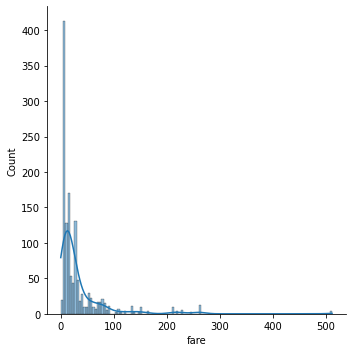

In [181]:
sns.displot(data = df, x = 'fare', kde = True)

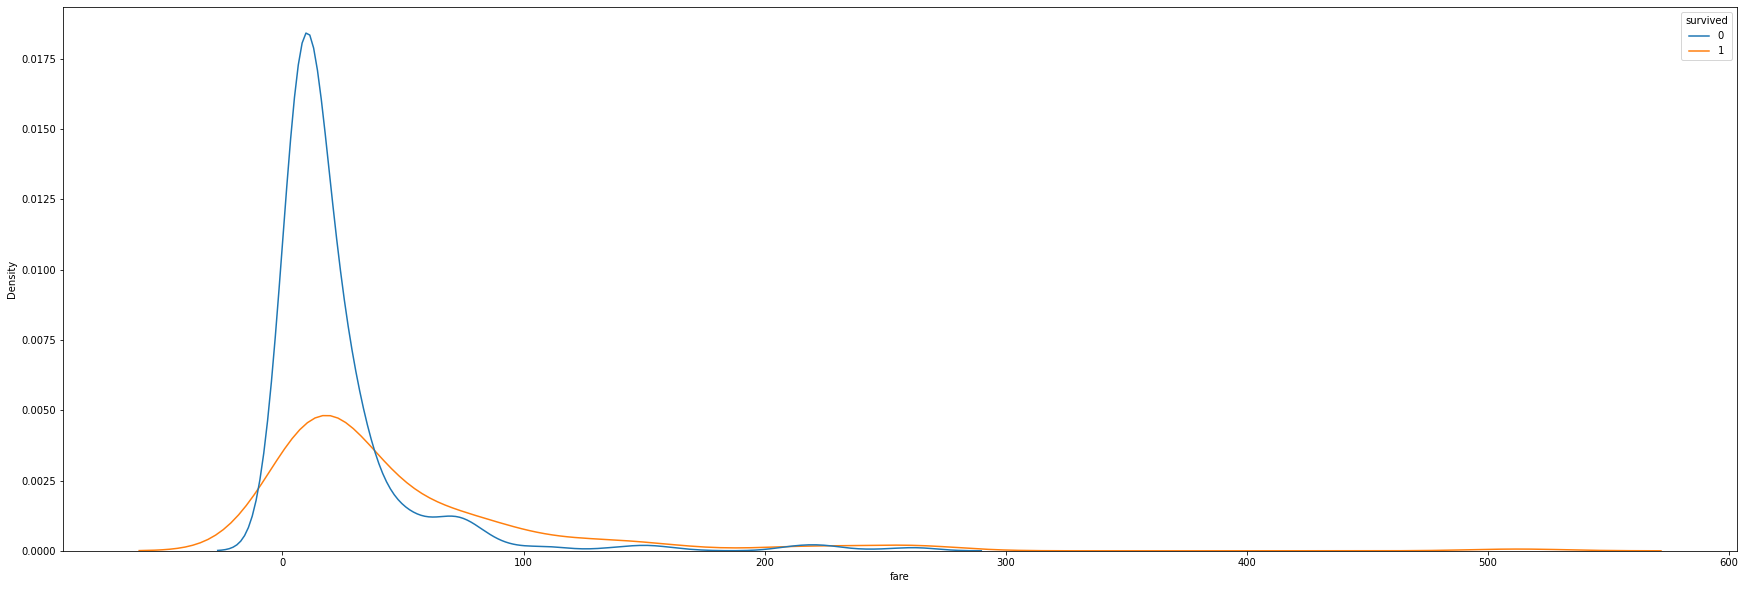

In [187]:
plt.figure(figsize=(30,10))
sns.kdeplot(data = df, x = 'fare', hue = 'survived')
plt.show()

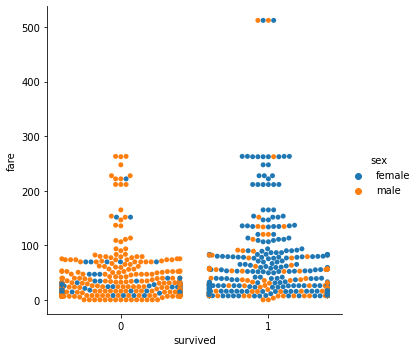

In [190]:
sns.catplot(data = df, x = 'survived', y = 'fare', hue = 'sex', kind = 'swarm')

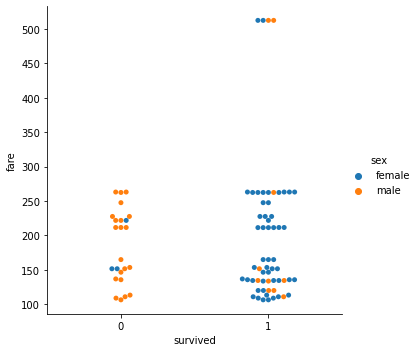

In [194]:
sns.catplot(data = df[df.fare>100], x = 'survived', y = 'fare', hue = 'sex', kind = 'swarm')

# Advanced analysis of titanic dataset

In [175]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,age_chunks,MissingBodyIndicator
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Adults,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Children,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Children,1


In [178]:
df.isna().sum()

pclass                     0
survived                   0
name                       0
sex                        0
age                      263
sibsp                      0
parch                      0
ticket                     0
fare                       1
cabin                   1014
embarked                   2
boat                     823
body                    1188
home_dest                564
age_chunks               264
MissingBodyIndicator       0
dtype: int64

In [179]:
# Columns to be removed either for being identifiers or for having a lot of missing values
cols_to_be_removed = ['cabin', 'body', 'home_dest', 'name', 'ticket', 'boat']
df1 = df.drop(columns = cols_to_be_removed)
df1.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator
0,1,1,female,29.0000,0,0,211.3375,S,Adults,1
1,1,1,male,0.9167,1,2,151.5500,S,Children,1
2,1,0,female,2.0000,1,2,151.5500,S,Children,1


In [205]:
df.groupby(['sex', 'age_chunks']).agg({'pclass':'count'})

pclass
sex    age_chunks        
female Children        91
       Adults         278
       Seniors         18
male   Children       101
       Adults         516
       Seniors         41

In [206]:
df.groupby(['sex', 'age_chunks', 'survived']).agg({'pclass':'count'})

pclass
sex    age_chunks survived        
female Children   0             29
                  1             62
       Adults     0             64
                  1            214
       Seniors    0              3
                  1             15
male   Children   0             69
                  1             32
       Adults     0            417
                  1             99
       Seniors    0             37
                  1              4

In [211]:
df.groupby(['sex', 'age_chunks']).agg({'fare':['mean', 'median', 'min', 'max']})

fare                            
                         mean    median     min       max
sex    age_chunks                                        
female Children     33.090020  19.25830  6.7500  262.3750
       Adults       52.106521  26.00000  6.9500  512.3292
       Seniors     111.245833  78.40415  9.5875  512.3292
male   Children     30.960891  20.25000  3.1708  262.3750
       Adults       26.345016  11.88750  0.0000  512.3292
       Seniors      52.401773  26.55000  6.2375  263.0000

In [213]:
df.groupby(['sex', 'age_chunks']).agg({'pclass':'count'})

pclass
sex    age_chunks        
female Children        91
       Adults         278
       Seniors         18
male   Children       101
       Adults         516
       Seniors         41

# Feature Engineering

In [215]:
df1.head(3)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator
0,1,1,female,29.0000,0,0,211.3375,S,Adults,1
1,1,1,male,0.9167,1,2,151.5500,S,Children,1
2,1,0,female,2.0000,1,2,151.5500,S,Children,1


## Analyzing the missing values

In [216]:
df1.isna().sum()

pclass                    0
survived                  0
sex                       0
age                     263
sibsp                     0
parch                     0
fare                      1
embarked                  2
age_chunks              264
MissingBodyIndicator      0
dtype: int64

### Imputing age column

<AxesSubplot: xlabel='age', ylabel='Density'>

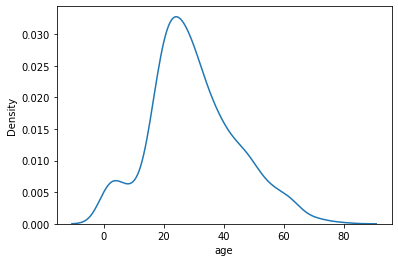

In [218]:
sns.kdeplot(data = df1, x = 'age')

<AxesSubplot: xlabel='age', ylabel='Density'>

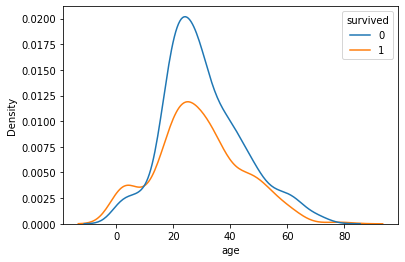

In [219]:
sns.kdeplot(data = df1, x = 'age', hue = 'survived')

<AxesSubplot: xlabel='age', ylabel='Density'>

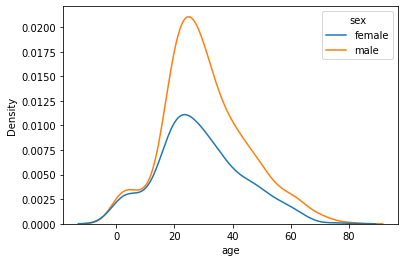

In [220]:
sns.kdeplot(data = df1, x = 'age', hue = 'sex')

In [221]:
df1.age.mean(), df1.age.median()

(29.8811345124283, 28.0)

In [229]:
imputer = SimpleImputer(strategy = 'median', add_indicator = True)

In [231]:
age_imputed = imputer.fit_transform(df1[['age']])

In [233]:
age_imputed

array([[29.    ,  0.    ],
       [ 0.9167,  0.    ],
       [ 2.    ,  0.    ],
       ...,
       [26.5   ,  0.    ],
       [27.    ,  0.    ],
       [29.    ,  0.    ]])

In [235]:
ages = age_imputed[:,0]
age_missing_flag = age_imputed[:,1]

In [238]:
df1['age_imputed'] = ages
df1['age_missing_flag'] = age_missing_flag

<AxesSubplot: ylabel='Density'>

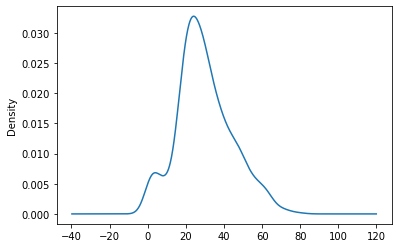

In [239]:
df1.age.plot(kind = 'kde')

<AxesSubplot: ylabel='Density'>

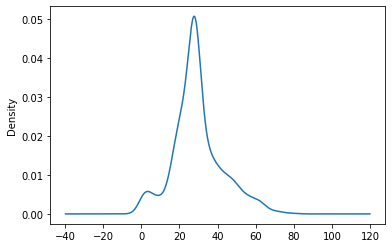

In [240]:
df1.age_imputed.plot(kind = 'kde')

In [241]:
df1.age.describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [242]:
df1.age_imputed.describe()

count    1309.000000
mean       29.503183
std        12.905246
min         0.166700
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: age_imputed, dtype: float64

In [244]:
df1.isna().sum()

pclass                    0
survived                  0
sex                       0
age                     263
sibsp                     0
parch                     0
fare                      1
embarked                  2
age_chunks              264
MissingBodyIndicator      0
age_imputed               0
age_missing_flag          0
dtype: int64

In [245]:
df1 = df1.drop(columns = ['age'])
df1.head()

,pclass,survived,sex,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator,age_imputed,age_missing_flag
0,1,1,female,0,0,211.3375,S,Adults,1,29.0000,0.0
1,1,1,male,1,2,151.5500,S,Children,1,0.9167,0.0
2,1,0,female,1,2,151.5500,S,Children,1,2.0000,0.0
3,1,0,male,1,2,151.5500,S,Adults,0,30.0000,0.0
4,1,0,female,1,2,151.5500,S,Adults,1,25.0000,0.0


In [251]:
df1['age_chunks'] = pd.cut(df1.age_imputed, bins = [0,18, 55, df1.age_imputed.max()], labels = ['Children', 'Adults', 'Seniors'])

In [252]:
df1.isna().sum()

pclass                  0
survived                0
sex                     0
sibsp                   0
parch                   0
fare                    1
embarked                2
age_chunks              0
MissingBodyIndicator    0
age_imputed             0
age_missing_flag        0
dtype: int64

In [264]:
df1 = df1.dropna().reset_index(drop=True)
df1.isna().sum()

pclass                  0
survived                0
sex                     0
sibsp                   0
parch                   0
fare                    0
embarked                0
age_chunks              0
MissingBodyIndicator    0
age_imputed             0
age_missing_flag        0
dtype: int64

# Feature Engineering

- All the transformations are included in feature engineering

In [267]:
df1.head()

,pclass,survived,sex,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator,age_imputed,age_missing_flag
0,1,1,female,0,0,211.3375,S,Adults,1,29.0000,0.0
1,1,1,male,1,2,151.5500,S,Children,1,0.9167,0.0
2,1,0,female,1,2,151.5500,S,Children,1,2.0000,0.0
3,1,0,male,1,2,151.5500,S,Adults,0,30.0000,0.0
4,1,0,female,1,2,151.5500,S,Adults,1,25.0000,0.0


### Transforming the gender column

In [268]:
df1.sex.value_counts()

male      842
female    464
Name: sex, dtype: int64

In [271]:
sex_encoded = pd.get_dummies(df1.sex, prefix = 'sex', drop_first = True)

In [274]:
df1 = pd.concat((df1, sex_encoded), axis = 'columns')
df1.head(3)

,pclass,survived,sex,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male
0,1,1,female,0,0,211.3375,S,Adults,1,29.0000,0.0,0
1,1,1,male,1,2,151.5500,S,Children,1,0.9167,0.0,1
2,1,0,female,1,2,151.5500,S,Children,1,2.0000,0.0,0


### Transforming embarked

In [275]:
df1.embarked.value_counts()

S    913
C    270
Q    123
Name: embarked, dtype: int64

In [277]:
embarked_enc = pd.get_dummies(df1.embarked, prefix='embarked', drop_first = True)

In [279]:
df1 = pd.concat((df1, embarked_enc), axis = 'columns')
df1.head(3)

,pclass,survived,sex,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S
0,1,1,female,0,0,211.3375,S,Adults,1,29.0000,0.0,0,0,1
1,1,1,male,1,2,151.5500,S,Children,1,0.9167,0.0,1,0,1
2,1,0,female,1,2,151.5500,S,Children,1,2.0000,0.0,0,0,1


### Encoding age_chunks

In [280]:
df1.age_chunks.value_counts()

Adults      1056
Children     193
Seniors       57
Name: age_chunks, dtype: int64

In [281]:
from sklearn.preprocessing import OrdinalEncoder

In [282]:
# Setting the sequence up as per the order required
age_chunks_sequence = ['Children', 'Adults', 'Seniors']
# Instantiaitng the ordinal encoder object
ord_enc = OrdinalEncoder(categories=[age_chunks_sequence])
ord_enc

OrdinalEncoder(categories=[['Children', 'Adults', 'Seniors']])

In [293]:
df1['age_chunks_ord_enc'] = ord_enc.fit_transform(df1[['age_chunks']]).flatten().astype(int)
df1.head(3)

,pclass,survived,sex,sibsp,parch,fare,embarked,age_chunks,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,1,female,0,0,211.3375,S,Adults,1,29.0000,0.0,0,0,1,1
1,1,1,male,1,2,151.5500,S,Children,1,0.9167,0.0,1,0,1,0
2,1,0,female,1,2,151.5500,S,Children,1,2.0000,0.0,0,0,1,0


In [295]:
df1.age_chunks_ord_enc.value_counts()

1    1056
0     193
2      57
Name: age_chunks_ord_enc, dtype: int64

### Removing the categorical features

In [296]:
cat_features = ['sex', 'embarked', 'age_chunks']

In [297]:
df2 = df1.drop(columns=cat_features)
df2.head(3)

,pclass,survived,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,1,0,0,211.3375,1,29.0000,0.0,0,0,1,1
1,1,1,1,2,151.5500,1,0.9167,0.0,1,0,1,0
2,1,0,1,2,151.5500,1,2.0000,0.0,0,0,1,0


In [298]:
df2.dtypes

pclass                    int64
survived                  int64
sibsp                     int64
parch                     int64
fare                    float64
MissingBodyIndicator      int64
age_imputed             float64
age_missing_flag        float64
sex_male                  uint8
embarked_Q                uint8
embarked_S                uint8
age_chunks_ord_enc        int64
dtype: object

# Modelling

### Partitioning the data

In [300]:
df2.columns

Index(['pclass', 'survived', 'sibsp', 'parch', 'fare', 'MissingBodyIndicator',
       'age_imputed', 'age_missing_flag', 'sex_male', 'embarked_Q',
       'embarked_S', 'age_chunks_ord_enc'],
      dtype='object')

In [301]:
target = ['survived']
x, y = df2.drop(columns=target), df2[target]

In [302]:
x.head(3)

,pclass,sibsp,parch,fare,MissingBodyIndicator,age_imputed,age_missing_flag,sex_male,embarked_Q,embarked_S,age_chunks_ord_enc
0,1,0,0,211.3375,1,29.0000,0.0,0,0,1,1
1,1,1,2,151.5500,1,0.9167,0.0,1,0,1,0
2,1,1,2,151.5500,1,2.0000,0.0,0,0,1,0


In [303]:
y.head(3)

,survived
0,1
1,1
2,0


In [314]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state = 9)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((914, 11), (392, 11), (914, 1), (392, 1))

### Evaluating a classification model

#### Base evaluation metrics for classification model
- Accuracy
- Precision
- Recall

#### Other evaluation metrics
- classification_report
- confusion_matrix
- roc_auc_curve
- f1_score

##### Confusion Matrix

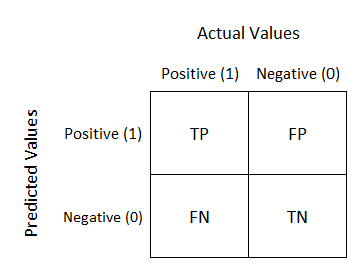

In [319]:
df2.survived.value_counts()

0    808
1    498
Name: survived, dtype: int64

- TP : True Positives : Records that were actually positives and were predicted as positives only
- TN : True Negatives : Records that were actually negatives and were predicted as negatives only

- FP : False Positives : Records that were actually negatives but were predicted as positives
- FN : False Negatives : Records that were actually positives but were predicted as negatives

##### Metrics derived from confusion matrix

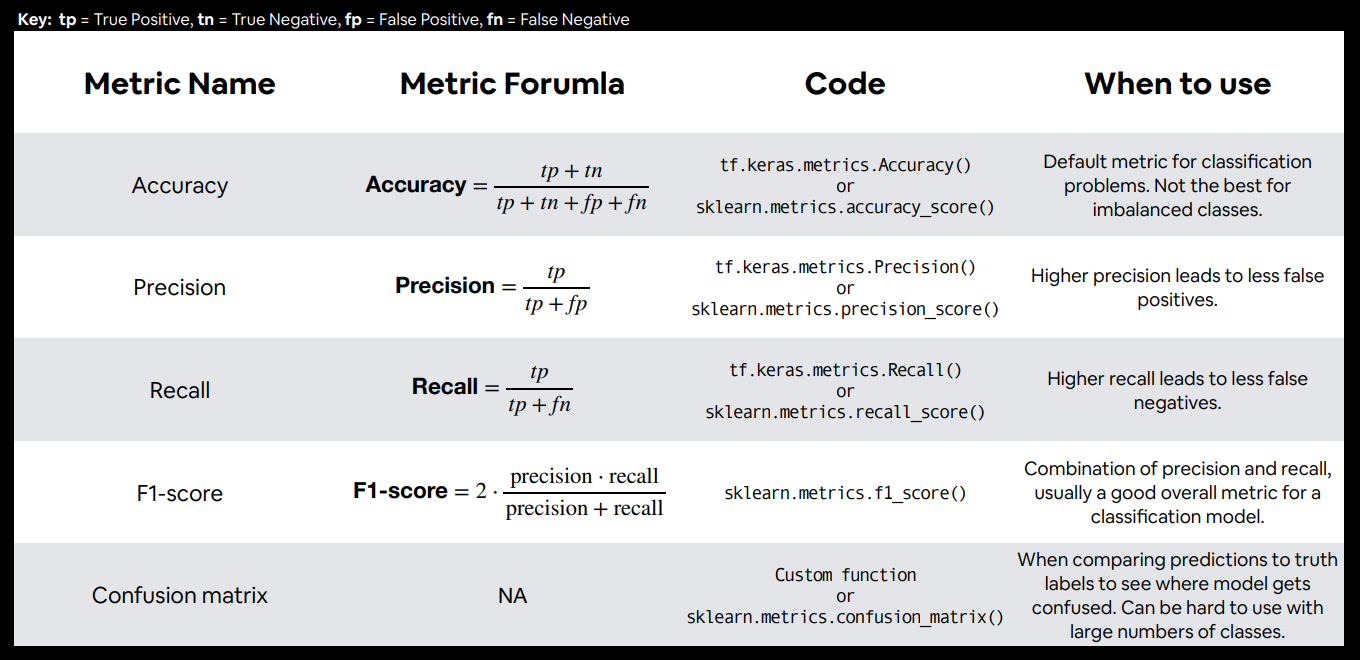

##### Accuracy

##### Precision, Recall and F-1 score

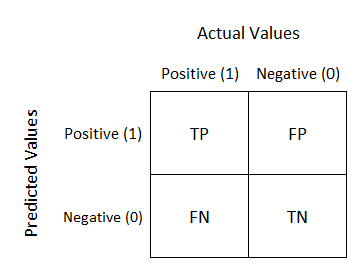

- Precision   :    Out of all the predicted positives, how many were actually positives
- Recall      :    Out of all the actual postives, how many were precdicted correctly
- F1-Score    :    Overall goodness{health} of the model

##### When to use what

- Whenever we are working with balanced data : accuracy
- Whenever we are working with imbalanced data :
    - When only positive class is important{When we have risk associated with positive class only}
        : Recall {Recall optimizes positive class only}
    - When the positive class is important but missclassification into the positive class is also risky
        : Precision {Precision optimizes both the classes}
    - When we are not sure/ we have no statistical/business idea on which class holds most of the risk
        : f1-score

### Base Model Building

In [320]:
# Instantiating the base model
log_reg_b = LogisticRegression()

# Training the base_model
log_reg_b.fit(train_x, train_y)

# Testing the base_model
y_pred = log_reg_b.predict(test_x)

In [321]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,

In [322]:
# Calculating the probabilities for each class individually
y_pred_proba = log_reg_b.predict_proba(test_x)
y_pred_proba

array([[9.13253252e-01, 8.67467480e-02],
       [8.95293407e-01, 1.04706593e-01],
       [3.61423537e-01, 6.38576463e-01],
       [2.23522460e-01, 7.76477540e-01],
       [2.43816607e-01, 7.56183393e-01],
       [7.14552560e-01, 2.85447440e-01],
       [9.88518979e-01, 1.14810212e-02],
       [7.15634124e-01, 2.84365876e-01],
       [8.92403830e-01, 1.07596170e-01],
       [9.94815520e-01, 5.18448040e-03],
       [9.07879095e-01, 9.21209055e-02],
       [2.88621325e-01, 7.11378675e-01],
       [1.07600494e-01, 8.92399506e-01],
       [8.58912542e-01, 1.41087458e-01],
       [5.87417866e-01, 4.12582134e-01],
       [4.52473075e-02, 9.54752692e-01],
       [8.15920080e-01, 1.84079920e-01],
       [1.23456985e-01, 8.76543015e-01],
       [7.52290847e-01, 2.47709153e-01],
       [9.17565898e-01, 8.24341025e-02],
       [8.55859682e-01, 1.44140318e-01],
       [5.40767411e-01, 4.59232589e-01],
       [7.25180962e-01, 2.74819038e-01],
       [5.29053389e-01, 4.70946611e-01],
       [9.075750

In [324]:
precision_score(test_y, y_pred)

0.7441860465116279

In [325]:
recall_score(test_y, y_pred)

0.6620689655172414

In [326]:
f1_score(test_y, y_pred)

0.7007299270072993

In [327]:
accuracy_score(test_y, y_pred)

0.7908163265306123

In [329]:
test_y.value_counts()

survived
0           247
1           145
dtype: int64

In [330]:
confusion_matrix(test_y, y_pred)

array([[214,  33],
       [ 49,  96]])

<AxesSubplot: >

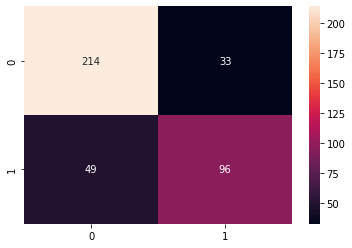

In [334]:
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt = '.3g')

In [336]:
df2.to_csv('Data/titanic_cleaned.csv', index=False)